In [1]:
versioninfo()

Julia Version 1.9.1
Commit 147bdf428c (2023-06-07 08:27 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 6 × Intel(R) Core(TM) i5-9600K CPU @ 3.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 6 virtual cores
Environment:
  JULIA_PYTHONCALL_EXE = python


In [2]:
using LinearAlgebra
using Random
using PyPlot
using MatrixDepot

include("expm_de.jl")

[ Info: verify download of index files...
[ Info: reading database
[ Info: adding metadata...
[ Info: adding svd data...
[ Info: writing database
[ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index


expm_de (generic function with 2 methods)

In [3]:
A_list = []
Ref_list = []

Random.seed!(1)
n = 50
Z = convert(Matrix{BigFloat}, mdopen("randsvd", n, 100).A)
for k = 1:2
    λ = [1 - 10^(2k*(i-1)/49) + randn()/20*im for i=1:n]
    D = Diagonal(λ)
    A = convert(Matrix{ComplexF64}, (Z * D) / Z)
    Ref = convert(Matrix{ComplexF64}, (Z * exp(D)) / Z)
    push!(A_list, A)
    push!(Ref_list, Ref)
end

In [4]:
ϵ = eps()
h = 0.005

results = []
σ_list = LinRange(-10, 5, 31)
for k = 1:2
    A = A_list[k]
    Ref = Ref_list[k]
    λ_right = maximum(real(eigvals(A)))

    err_list = zero(σ_list)
    for (i, σ) in enumerate(σ_list)
        r = expm_de(A, h, ϵ=ϵ/2, λ_right=λ_right, σ=σ)
        X = r.X
        err_list[i] = opnorm(Ref - X)
    end
    push!(results, err_list)
end

In [5]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 6
rcParams["axes.titlesize"] = 6

6

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


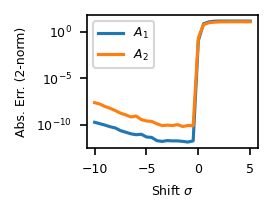

In [6]:
fig, ax = subplots(1, 1, figsize=(1.8, 1.4), dpi=150)
for k = 1:2
    x = σ_list
    y = results[k]
    ax.plot(x, y, label="\$A_$(k)\$")
    ax.set_yscale("log")
    ax.set_xlabel("Shift \$\\sigma\$")
    ax.set_ylabel("Abs. Err. (2-norm)")
    ax.set_yticks([1e-10, 1e-5, 1e0])
    ax.legend()
end
fig.tight_layout()
fig.savefig("fig/test2.pdf", pad_inches=0)
show()